# Importanto las librerias que se necesitara

In [15]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt

# Lectura de datos y normalizacion de datos

In [16]:
def leer_datos(dataset):
    data = pd.read_csv(dataset) 

    data = data.iloc[:,:]
    return data

def normalizacion(data):
    data_media = data.mean(axis=0)
    data_std = data.std(axis=0)

    data = (data - data_media)/data_std
    return data


In [17]:
from sklearn.model_selection import train_test_split

#Crear Entrenamiento Prueba: conjunto de entrenamiento(70 %)
def division_datos(data):
    x = data.iloc[:,:-1]
    y = data.iloc[:,-1]

    X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42)
    return X_train, X_test, y_train, y_test 

# Funciones de regresion lineal

In [23]:
def calcular_costo(theta, X, y):
    y_pred = np.dot(X, theta)
    to_sum = (y_pred - y) ** 2
    return np.sum(to_sum) / (X.shape[0]*2)

def gradiente_descendente(X,y,theta):
    cost_history = np.zeros(iters)
    for it in range(iters):
        H_theta = np.dot(X,theta)
        theta = theta -(1/H_theta.shape[0])*alpha*( X.T.dot((H_theta - y)))
        cost_history[it]  = calcular_costo(theta,X,y)
    return theta, cost_history

def ecuacion_normal(X_train, y_train):
    theta_ = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_train), X_train)), np.transpose(X_train)), y_train)
    return theta_

# Experimentando

In [20]:
#parametros
data = leer_datos('ex1data2.csv')
data = normalizacion(data)
X_train, X_test, y_train, y_test = division_datos(data)
alpha = 0.01
iters = 1500
theta = np.zeros([X_train.shape[1]])
#print(theta.shape)
#print(theta)

theta, cost_history = gradiente_descendente(X_train, y_train, theta)

print("Gradiente descendente")
print("Vector Theta")
print(theta)
print("Costo (Error Cuadrático Medio)")
print(cost_history)



Entrenamiento usando gradiente descendente
Vector Theta
Size_(m2)    0.824822
dtype: float64
Costo (Error Cuadrático Medio)
[0.4080817  0.40255127 0.39712126 ... 0.10348609 0.10348609 0.10348609]


In [24]:
theta_ = ecuacion_normal(X_train, y_train)
cost = calcular_costo(theta_,X_test, y_test)

print("Ecuacion Normal")
print("Vector Theta")
print(theta_)
print("Costo (Error Cuadrático Medio)")
print(cost)

Ecuacion Normal
Vector Theta
[0.82482323]
Costo (Error Cuadrático Medio)
0.19308569913138995


# Ploteando los costos

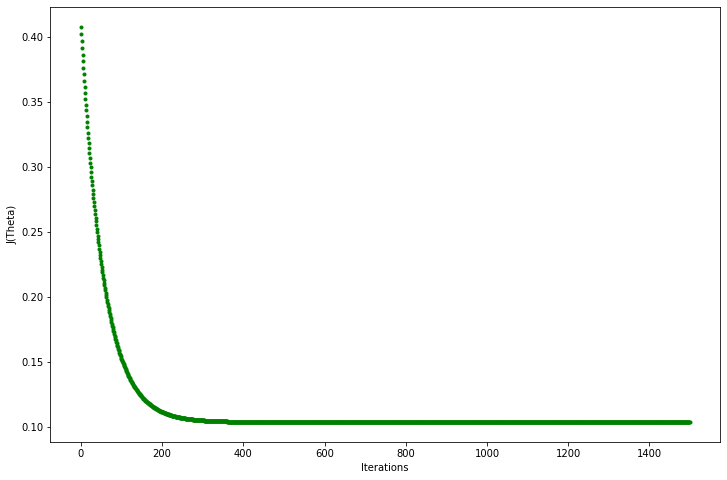

In [26]:
def plot():
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_ylabel('J(Theta)')
    ax.set_xlabel('Iterations')
    _ = ax.plot(range(iters), cost_history, 'g.')
    plt.show()


    
plot()